# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

AbdulMuiz Shaikh

In this Jupyter notebook, we will be building a real-life data science project on Bioinformatics. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [20]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-09-18 22:24:10--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.3’

Miniconda3-py37_4.8 100%[===================>]  81.12M   149MB/s    in 0.5s    

2025-09-18 22:24:10 (149 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.3’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
 

## **Load bioactivity data**

In [19]:
df = pd.read_csv('/content/hERG_bioactivity_data_curated.csv')

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('hERG_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL12713,O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc...,14.00,active
1,CHEMBL1108,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,32.20,active
2,CHEMBL2368925,O=C(O[C@@H]1C[C@@H]2C[C@H]3C[C@H](C1)N2CC3=O)c...,5950.00,intermediate
3,CHEMBL6966,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,143.00,active
4,CHEMBL1107,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...,196.00,active
...,...,...,...,...
7175,CHEMBL3920203,CC(C)S(=O)(=O)NCCN1CC2CN(C[C@H](O)COc3ccc(C#N)...,1905.46,intermediate
7176,CHEMBL3917472,CC(C)(C)NS(=O)(=O)CCCN1CC2CN(CCCOc3ccc(C#N)cc3...,31622.78,inactive
7177,CHEMBL3980357,CC(C)(C)OC(=O)NCCN1CC2CN(CCNS(=O)(=O)c3ccc(F)c...,31622.78,inactive
7178,CHEMBL3976526,O=S(=O)(NCCN1CC2CN(Cc3ccccc3)CC(C1)O2)c1ccc(F)cc1,31622.78,inactive


In [14]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [15]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [16]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL12713,14.00,active,O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc...
1,CHEMBL1108,32.20,active,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...
2,CHEMBL2368925,5950.00,intermediate,O=C(O[C@@H]1C[C@@H]2C[C@H]3C[C@H](C1)N2CC3=O)c...
3,CHEMBL6966,143.00,active,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...
4,CHEMBL1107,196.00,active,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...
...,...,...,...,...
7175,CHEMBL3920203,1905.46,intermediate,CC(C)S(=O)(=O)NCCN1CC2CN(C[C@H](O)COc3ccc(C#N)...
7176,CHEMBL3917472,31622.78,inactive,CC(C)(C)NS(=O)(=O)CCCN1CC2CN(CCCOc3ccc(C#N)cc3...
7177,CHEMBL3980357,31622.78,inactive,CC(C)(C)OC(=O)NCCN1CC2CN(CCNS(=O)(=O)c3ccc(F)c...
7178,CHEMBL3976526,31622.78,inactive,O=S(=O)(NCCN1CC2CN(Cc3ccccc3)CC(C1)O2)c1ccc(F)cc1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [21]:
!pip install rdkit-pypi

     |████████████████████████████████| 29.2 MB 1.4 MB/s 


In [23]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [24]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [25]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,440.950,4.62760,1.0,3.0
1,379.435,3.67840,1.0,4.0
2,324.380,2.51900,1.0,4.0
3,454.611,5.09308,0.0,6.0
4,500.432,8.64430,1.0,2.0
...,...,...,...,...
7175,452.577,0.01078,2.0,8.0
7176,464.632,1.82018,1.0,7.0
7177,472.583,1.01370,2.0,7.0
7178,419.522,1.68920,1.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [26]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,440.950,4.62760,1.0,3.0
1,379.435,3.67840,1.0,4.0
2,324.380,2.51900,1.0,4.0
3,454.611,5.09308,0.0,6.0
4,500.432,8.64430,1.0,2.0
...,...,...,...,...
7175,452.577,0.01078,2.0,8.0
7176,464.632,1.82018,1.0,7.0
7177,472.583,1.01370,2.0,7.0
7178,419.522,1.68920,1.0,5.0


In [27]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL12713,O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc...,14.00,active
1,CHEMBL1108,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,32.20,active
2,CHEMBL2368925,O=C(O[C@@H]1C[C@@H]2C[C@H]3C[C@H](C1)N2CC3=O)c...,5950.00,intermediate
3,CHEMBL6966,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,143.00,active
4,CHEMBL1107,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...,196.00,active
...,...,...,...,...
7175,CHEMBL3920203,CC(C)S(=O)(=O)NCCN1CC2CN(C[C@H](O)COc3ccc(C#N)...,1905.46,intermediate
7176,CHEMBL3917472,CC(C)(C)NS(=O)(=O)CCCN1CC2CN(CCCOc3ccc(C#N)cc3...,31622.78,inactive
7177,CHEMBL3980357,CC(C)(C)OC(=O)NCCN1CC2CN(CCNS(=O)(=O)c3ccc(F)c...,31622.78,inactive
7178,CHEMBL3976526,O=S(=O)(NCCN1CC2CN(Cc3ccccc3)CC(C1)O2)c1ccc(F)cc1,31622.78,inactive


Now, let's combine the 2 DataFrame

In [28]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [29]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL12713,O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc...,14.00,active,440.950,4.62760,1.0,3.0
1,CHEMBL1108,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,32.20,active,379.435,3.67840,1.0,4.0
2,CHEMBL2368925,O=C(O[C@@H]1C[C@@H]2C[C@H]3C[C@H](C1)N2CC3=O)c...,5950.00,intermediate,324.380,2.51900,1.0,4.0
3,CHEMBL6966,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,143.00,active,454.611,5.09308,0.0,6.0
4,CHEMBL1107,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...,196.00,active,500.432,8.64430,1.0,2.0
...,...,...,...,...,...,...,...,...
7175,CHEMBL3920203,CC(C)S(=O)(=O)NCCN1CC2CN(C[C@H](O)COc3ccc(C#N)...,1905.46,intermediate,452.577,0.01078,2.0,8.0
7176,CHEMBL3917472,CC(C)(C)NS(=O)(=O)CCCN1CC2CN(CCCOc3ccc(C#N)cc3...,31622.78,inactive,464.632,1.82018,1.0,7.0
7177,CHEMBL3980357,CC(C)(C)OC(=O)NCCN1CC2CN(CCNS(=O)(=O)c3ccc(F)c...,31622.78,inactive,472.583,1.01370,2.0,7.0
7178,CHEMBL3976526,O=S(=O)(NCCN1CC2CN(Cc3ccccc3)CC(C1)O2)c1ccc(F)cc1,31622.78,inactive,419.522,1.68920,1.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [36]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [37]:
df_combined.standard_value.describe()

,standard_value
count,7.180000e+03
mean,1.101526e+06
std,2.785541e+07
min,1.400000e-01
25%,2.000000e+03
50%,9.500000e+03
75%,3.000000e+04
max,1.000000e+09


In [38]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [39]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [40]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [41]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL12713,O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc...,active,440.950,4.62760,1.0,3.0,14.00
1,CHEMBL1108,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,active,379.435,3.67840,1.0,4.0,32.20
2,CHEMBL2368925,O=C(O[C@@H]1C[C@@H]2C[C@H]3C[C@H](C1)N2CC3=O)c...,intermediate,324.380,2.51900,1.0,4.0,5950.00
3,CHEMBL6966,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,active,454.611,5.09308,0.0,6.0,143.00
4,CHEMBL1107,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...,active,500.432,8.64430,1.0,2.0,196.00
...,...,...,...,...,...,...,...,...
7175,CHEMBL3920203,CC(C)S(=O)(=O)NCCN1CC2CN(C[C@H](O)COc3ccc(C#N)...,intermediate,452.577,0.01078,2.0,8.0,1905.46
7176,CHEMBL3917472,CC(C)(C)NS(=O)(=O)CCCN1CC2CN(CCCOc3ccc(C#N)cc3...,inactive,464.632,1.82018,1.0,7.0,31622.78
7177,CHEMBL3980357,CC(C)(C)OC(=O)NCCN1CC2CN(CCNS(=O)(=O)c3ccc(F)c...,inactive,472.583,1.01370,2.0,7.0,31622.78
7178,CHEMBL3976526,O=S(=O)(NCCN1CC2CN(Cc3ccccc3)CC(C1)O2)c1ccc(F)cc1,inactive,419.522,1.68920,1.0,5.0,31622.78


In [42]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,7.180000e+03
mean,2.944753e+05
std,4.718859e+06
min,1.400000e-01
25%,2.000000e+03
50%,9.500000e+03
75%,3.000000e+04
max,1.000000e+08


In [43]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL12713,O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc...,active,440.950,4.62760,1.0,3.0,7.853872
1,CHEMBL1108,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,active,379.435,3.67840,1.0,4.0,7.492144
2,CHEMBL2368925,O=C(O[C@@H]1C[C@@H]2C[C@H]3C[C@H](C1)N2CC3=O)c...,intermediate,324.380,2.51900,1.0,4.0,5.225483
3,CHEMBL6966,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,active,454.611,5.09308,0.0,6.0,6.844664
4,CHEMBL1107,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...,active,500.432,8.64430,1.0,2.0,6.707744
...,...,...,...,...,...,...,...,...
7175,CHEMBL3920203,CC(C)S(=O)(=O)NCCN1CC2CN(C[C@H](O)COc3ccc(C#N)...,intermediate,452.577,0.01078,2.0,8.0,5.720000
7176,CHEMBL3917472,CC(C)(C)NS(=O)(=O)CCCN1CC2CN(CCCOc3ccc(C#N)cc3...,inactive,464.632,1.82018,1.0,7.0,4.500000
7177,CHEMBL3980357,CC(C)(C)OC(=O)NCCN1CC2CN(CCNS(=O)(=O)c3ccc(F)c...,inactive,472.583,1.01370,2.0,7.0,4.500000
7178,CHEMBL3976526,O=S(=O)(NCCN1CC2CN(Cc3ccccc3)CC(C1)O2)c1ccc(F)cc1,inactive,419.522,1.68920,1.0,5.0,4.500000


In [44]:
df_final.pIC50.describe()

,pIC50
count,7180.000000
mean,5.224181
std,0.965422
min,1.000000
25%,4.522879
50%,5.022276
75%,5.698970
max,9.853872


Let's write this to CSV file.

In [45]:
df_final.to_csv('hERG_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [46]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL12713,O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc...,active,440.950,4.62760,1.0,3.0,7.853872
1,CHEMBL1108,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,active,379.435,3.67840,1.0,4.0,7.492144
3,CHEMBL6966,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,active,454.611,5.09308,0.0,6.0,6.844664
4,CHEMBL1107,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...,active,500.432,8.64430,1.0,2.0,6.707744
5,CHEMBL998,CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,active,382.891,4.88780,0.0,3.0,6.761954
...,...,...,...,...,...,...,...,...
7174,CHEMBL2440857,COc1ccc2c(c1)CN(C(=O)CCN1CCC(Cc3ccccc3)CC1)CCS...,active,424.610,4.47430,0.0,4.0,6.334419
7176,CHEMBL3917472,CC(C)(C)NS(=O)(=O)CCCN1CC2CN(CCCOc3ccc(C#N)cc3...,inactive,464.632,1.82018,1.0,7.0,4.500000
7177,CHEMBL3980357,CC(C)(C)OC(=O)NCCN1CC2CN(CCNS(=O)(=O)c3ccc(F)c...,inactive,472.583,1.01370,2.0,7.0,4.500000
7178,CHEMBL3976526,O=S(=O)(NCCN1CC2CN(Cc3ccccc3)CC(C1)O2)c1ccc(F)cc1,inactive,419.522,1.68920,1.0,5.0,4.500000


Let's write this to CSV file.

In [48]:
df_2class.to_csv('hERG_bioactivity_data_class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [49]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

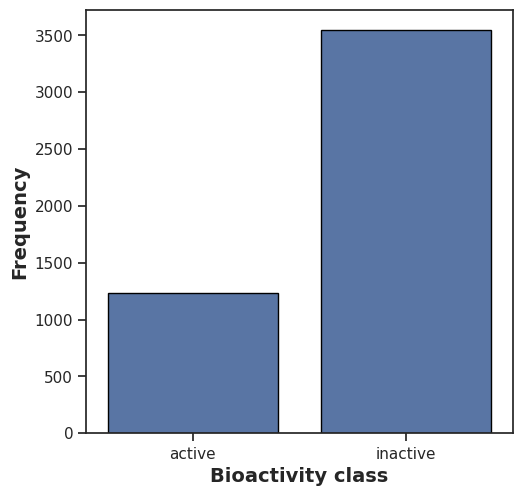

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

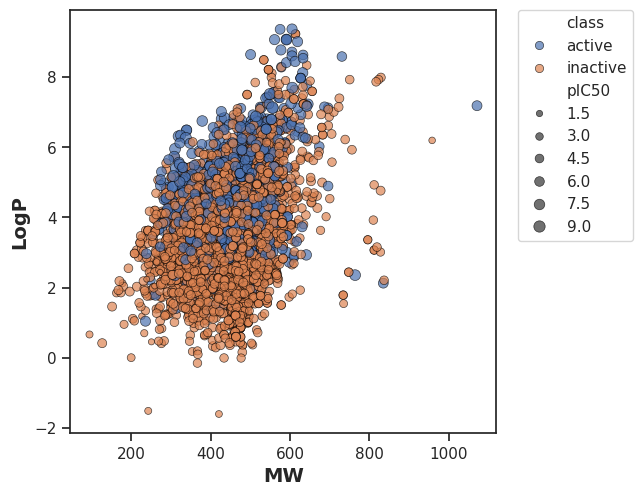

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

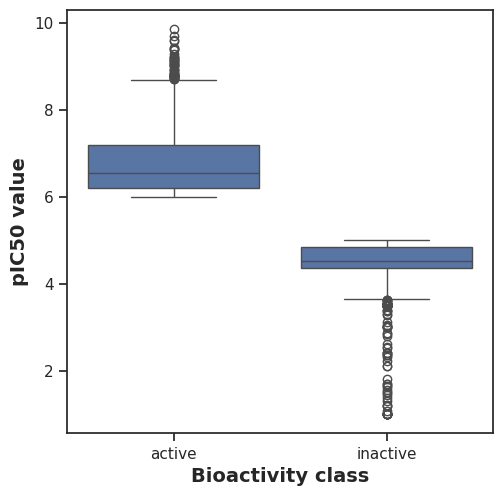

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [53]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [54]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4364040.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

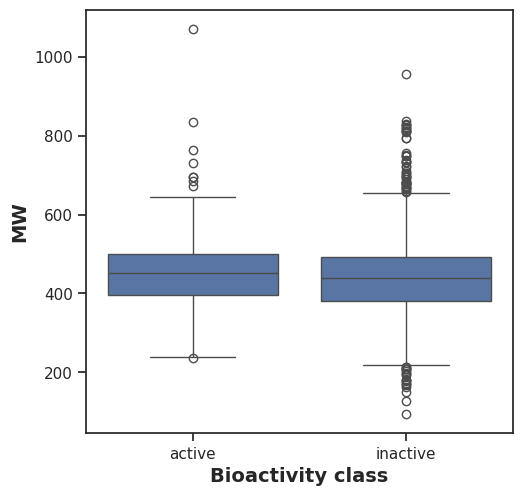

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [56]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2358434.0,0.000023,0.05,Different distribution (reject H0)


#### **LogP**

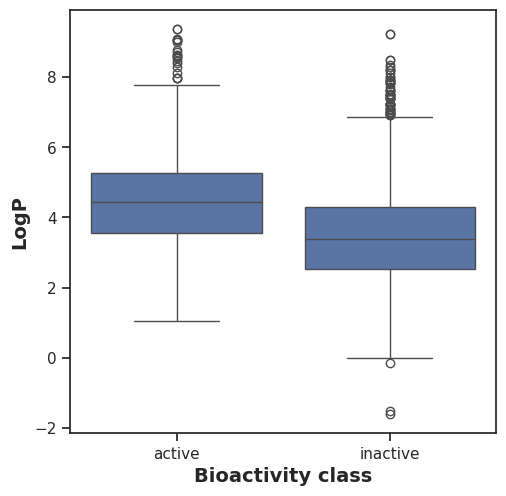

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [58]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3119639.0,5.112883e-112,0.05,Different distribution (reject H0)


#### **NumHDonors**

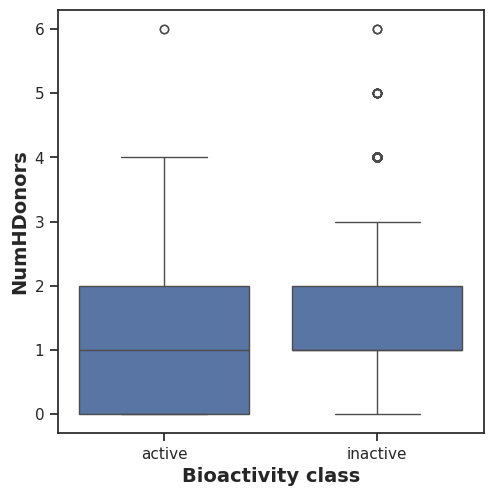

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [60]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1600850.0,4.829526e-48,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

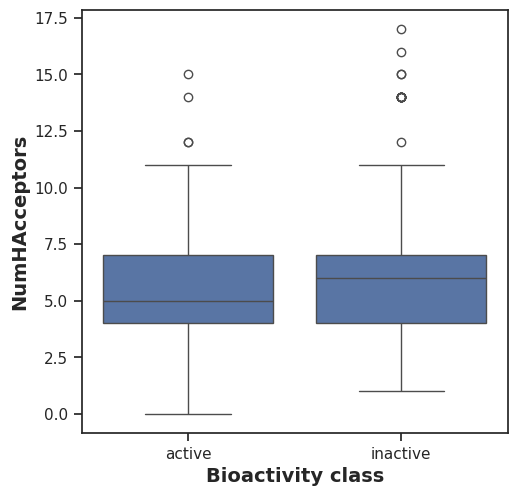

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [62]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1907923.5,3.223118e-11,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [63]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_ic50.pdf (deflated 35%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: hERG_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: hERG_bioactivity_data_curated.csv (deflated 83%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: hERG_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: hERG_bioactivity_data_class_pIC50.csv (deflated 77%)
